# Sampling from Posterior Distribution

### Posterior Distribution 

The posteriror distribution follows a gamma distribution: $f_1(\theta | X_1, \dots, X_n) \propto \theta^{\sum X_i + \alpha -1} \cdot e^{-(n+\beta) \theta}$

### AR Algorithm

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import warnings
warnings.filterwarnings("ignore")

In [16]:
def AR_algorithm(alpha, beta, data, num_samples=1000):
    n = len(data)
    # Posterior parameters
    alpha_post = alpha + np.sum(data)
    beta_post = beta + n
    
    # Proposal parameters (Just use the same shape and rate as the posterior)
    alpha_prop = alpha_post
    beta_prop = beta_post
    
    # Proposal distribution: Gamma(alpha_prop, beta_prop)
    def proposal_distribution():
        return gamma.rvs(alpha_prop, scale=1/beta_prop)
    
    # Target distribution: Gamma(alpha_post, beta_post) (posterior)
    def target_distribution(theta):
        if theta > 0:
            return (theta ** (alpha_post - 1)) * np.exp(-beta_post * theta) / gamma.pdf(theta, alpha_post, scale=1/beta_post)
        else:
            return 0
    
    # A-R sampling loop
    accepted_samples = []
    while len(accepted_samples) < num_samples:
        theta_star = proposal_distribution()
        # Calculate acceptance ratio
        ratio = target_distribution(theta_star) / gamma.pdf(theta_star, alpha_prop, scale=1/beta_prop)
        
        # Accept with probability ratio
        if np.random.uniform(0, 1) < ratio:
            accepted_samples.append(theta_star)
    
    return np.array(accepted_samples)



##### $\alpha = \beta = 2$, num_samples = 1000

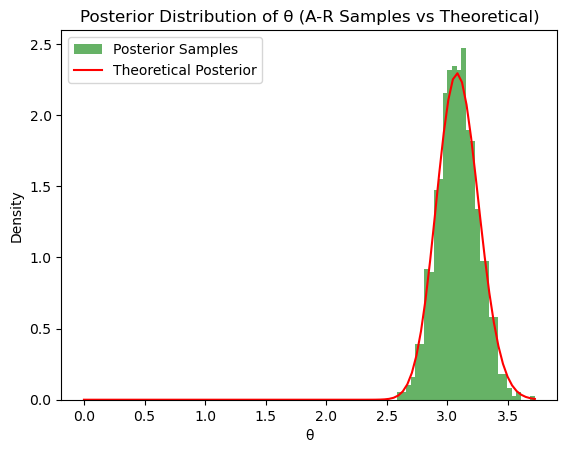

In [17]:
# Set prior: The initial set before observing any data
alpha = 2
beta = 2

# Generate 100 RV following possion distribution with mean 3
# Actually any distributions is allowed to use to generate, 
data = np.random.poisson(3, 100) 

# Posterior is calculated using these preset params

samples = AR_algorithm(alpha, beta, data, num_samples=1000)

# Visualizing the result
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Posterior Samples')
x_vals = np.linspace(0, np.max(samples), 100)
y_vals = gamma.pdf(x_vals, alpha + np.sum(data), scale=1 / (beta + len(data)))
plt.plot(x_vals, y_vals, 'r-', label='Theoretical Posterior')
plt.legend()
plt.title("Posterior Distribution of θ (A-R Samples vs Theoretical)")
plt.xlabel("θ")
plt.ylabel("Density")
plt.show()

##### $\alpha = \beta = 2$, num_samples = 10000

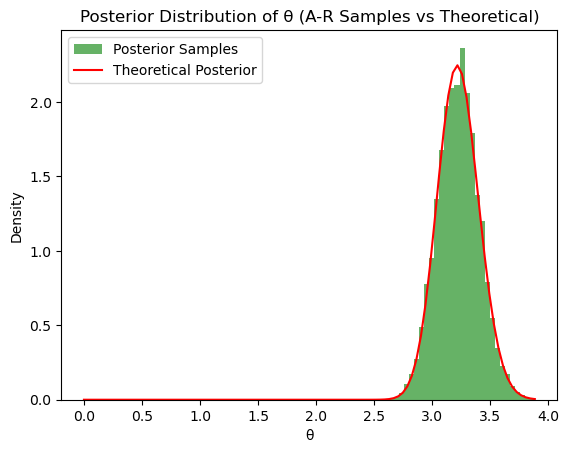

In [18]:
# Set prior: The initial set before observing any data
alpha = 2
beta = 2
data = np.random.poisson(3, 100) 

# Posterior is calculated using these preset params

samples = AR_algorithm(alpha, beta, data, num_samples=10000)

# Visualizing the result
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Posterior Samples')
x_vals = np.linspace(0, np.max(samples), 100)
y_vals = gamma.pdf(x_vals, alpha + np.sum(data), scale=1 / (beta + len(data)))
plt.plot(x_vals, y_vals, 'r-', label='Theoretical Posterior')
plt.legend()
plt.title("Posterior Distribution of θ (A-R Samples vs Theoretical)")
plt.xlabel("θ")
plt.ylabel("Density")
plt.show()

##### $\alpha =1,  \beta = 2$, num_samples = 1000

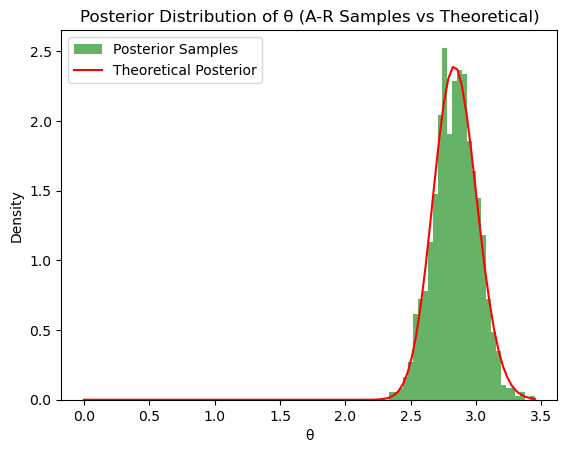

In [29]:
# Set prior: The initial set before observing any data
alpha = 1
beta = 2
data = np.random.poisson(3, 100) 

# Posterior is calculated using these preset params

samples = AR_algorithm(alpha, beta, data, num_samples=1000)

# Visualizing the result
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Posterior Samples')
x_vals = np.linspace(0, np.max(samples), 100)
y_vals = gamma.pdf(x_vals, alpha + np.sum(data), scale=1 / (beta + len(data)))
plt.plot(x_vals, y_vals, 'r-', label='Theoretical Posterior')
plt.legend()
plt.title("Posterior Distribution of θ (A-R Samples vs Theoretical)")
plt.xlabel("θ")
plt.ylabel("Density")
plt.show()

##### $\alpha = 2, \beta = 1$, num_samples = 1000

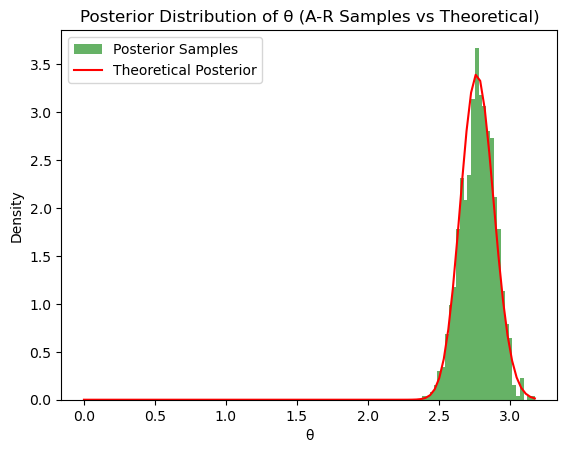

In [33]:
# Set prior: The initial set before observing any data
alpha = 2
beta = 1
data = np.random.poisson(3, 100) 

# Posterior is calculated using these preset params

samples = AR_algorithm(alpha, beta, data, num_samples=1000)

# Visualizing the result
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Posterior Samples')
x_vals = np.linspace(0, np.max(samples), 100)
y_vals = gamma.pdf(x_vals, alpha + np.sum(data), scale=1 / (beta + len(data)))
plt.plot(x_vals, y_vals, 'r-', label='Theoretical Posterior')
plt.legend()
plt.title("Posterior Distribution of θ (A-R Samples vs Theoretical)")
plt.xlabel("θ")
plt.ylabel("Density")
plt.show()